## Réalisé par:
- ***OUSSAMA NOR***

- ***KHALID EL MESRI***

## P1. MODEM QAM

## CONCEPTION & IMPLEMENTATION (PYTHON)

In [1]:
import numpy as np
import pandas as pd

def decimal_to_gray(n):
    return n ^ (n >> 1)

def gray_code(n, k):
    return [format(decimal_to_gray(i), f'0{k}b') for i in range(n)]

def binary_code(n, k):
    return [format(i, f'0{k}b') for i in range(n)]

def generate_constellation(M, use_gray=False):
    k = int(np.log2(M))
    symbols = np.arange(M)
    bits_list = gray_code(M, k) if use_gray else binary_code(M, k)
    decimals = [int(b, 2) for b in bits_list]
    
    sqrt_M = int(np.sqrt(M))
    if sqrt_M ** 2 != M:
        raise ValueError("Ce script prend en charge uniquement les constellations carrées (M=4, 16, 64...)")
    
    levels = np.linspace(-(sqrt_M - 1), sqrt_M - 1, sqrt_M)
    I, Q = np.meshgrid(levels, levels)
    I = I.flatten()
    Q = Q.flatten()
    
    energies = I**2 + Q**2
    phases = np.arctan2(Q, I)
    
    df = pd.DataFrame({
        "Symbole": symbols,
        "Bits": bits_list,
        "Décimal": decimals,
        "I": I,
        "Q": Q,
        "Énergie": energies,
        "Phase (rad)": phases
    })
    
    return df.sort_values("Symbole").reset_index(drop=True)

def bilan_energies_phases(df):
    energie_moy = df["Énergie"].mean()
    phase_moy = df["Phase (rad)"].mean()
    return energie_moy, phase_moy

# ----------------------------
# INTERACTION UTILISATEUR
# ----------------------------
print("=== Paramètres de la Constellation ===")
choix = input("Souhaitez-vous entrer (1) le nombre de symboles [NBRE_SYMBL] ou (2) le nombre de bits/symbole [NBRE_BITS/SYMBL] ? [1/2] : ")

if choix == '1':
    M = int(input("Entrez le nombre de symboles (ex: 16) : "))
    k = int(np.log2(M))
elif choix == '2':
    k = int(input("Entrez le nombre de bits par symbole (ex: 4) : "))
    M = 2 ** k
else:
    raise ValueError("Choix invalide. Tapez 1 ou 2.")

gray_input = input("Souhaitez-vous utiliser le code Gray ? (o/n) : ").strip().lower()
use_gray = gray_input == 'o'

# ----- GÉNÉRATION -----
table = generate_constellation(M, use_gray=use_gray)
energie_moy, phase_moy = bilan_energies_phases(table)

# ----- AFFICHAGE -----
print("\n=== Tableau de correspondance ===\n")
print(table)

print("\n=== Bilan énergétique et de phase ===")
print(f"Énergie moyenne : {energie_moy:.2f}")
print(f"Phase moyenne   : {phase_moy:.2f} rad")

# Sauvegarde optionnelle :
# table.to_csv("constellation_table.csv", index=False)


=== Paramètres de la Constellation ===


Souhaitez-vous entrer (1) le nombre de symboles [NBRE_SYMBL] ou (2) le nombre de bits/symbole [NBRE_BITS/SYMBL] ? [1/2] :  1
Entrez le nombre de symboles (ex: 16) :  16
Souhaitez-vous utiliser le code Gray ? (o/n) :  o



=== Tableau de correspondance ===

    Symbole  Bits  Décimal    I    Q  Énergie  Phase (rad)
0         0  0000        0 -3.0 -3.0     18.0    -2.356194
1         1  0001        1 -1.0 -3.0     10.0    -1.892547
2         2  0011        3  1.0 -3.0     10.0    -1.249046
3         3  0010        2  3.0 -3.0     18.0    -0.785398
4         4  0110        6 -3.0 -1.0     10.0    -2.819842
5         5  0111        7 -1.0 -1.0      2.0    -2.356194
6         6  0101        5  1.0 -1.0      2.0    -0.785398
7         7  0100        4  3.0 -1.0     10.0    -0.321751
8         8  1100       12 -3.0  1.0     10.0     2.819842
9         9  1101       13 -1.0  1.0      2.0     2.356194
10       10  1111       15  1.0  1.0      2.0     0.785398
11       11  1110       14  3.0  1.0     10.0     0.321751
12       12  1010       10 -3.0  3.0     18.0     2.356194
13       13  1011       11 -1.0  3.0     10.0     1.892547
14       14  1001        9  1.0  3.0     10.0     1.249046
15       15  1000   

--------------------------------------------------------------------------------------------------------------------------------------------------------
 ## 1.Description générale du script:
 
 Ce script Python permet de :

✅ Générer une constellation QAM carrée (par exemple : 4-QAM, 16-QAM, 64-QAM…)

✅ Associer à chaque symbole :

- Son indice,

- Sa représentation binaire (code binaire ou code Gray),

- Ses coordonnées I et Q,

- Son énergie (I² + Q²),

- Et sa phase (argument complexe).

✅ Calculer :

- L'énergie moyenne des symboles,

- La phase moyenne des symboles.

✅ Afficher le tout dans un tableau clair (DataFrame).

## 2.Explication fonction par fonction de code :

***-decimal_to_gray(n):***

➡️ Convertit un entier n en code Gray.
Cela permet de réduire les erreurs de bit lors de la modulation.

***-gray_code(n, k):***

➡️ Retourne la liste des n premiers mots en code Gray, avec une longueur de k bits chacun.
Exemple : pour M=4 → ['00', '01', '11', '10'].

***-binary_code(n, k):***

➡️ Retourne la liste des n premiers mots binaires classiques, en k bits.

***-generate_constellation(M, use_gray=False):***

Fonction principale qui :

1.Génère les symboles binaires (code Gray ou binaire).

2.Place les symboles sur une grille carrée I-Q (ex : pour M=16 → grille 4x4).

3.Calcule :

Coordonnées I et Q.

Énergie de chaque point.

Phase de chaque point.

➡️ Retourne un DataFrame Pandas contenant tous les détails des symboles.

***-bilan_energies_phases(df):***

➡️ Calcule l'énergie moyenne et la phase moyenne de tous les symboles présents dans la constellation df.







 


=== MENU ===
1. Simulation personnalisée (constellation + BER)
2. Comparaison BER : Gray vs Binaire
3. Quitter


Entrez votre choix (1/2/3) :  1



Simulation BER vs SNR avec constellation RX personnalisée


Entrez M (ex: 4, 16, 64, 256):  16
🎛️ Utiliser le code Gray ? (o/n) :  o
Entrez l’indice décimal du symbole à afficher en premier (entre 0 et 15) :  15
Choisir la valeur I parmi [-3, -1, 1, 3] :  -1
Choisir la valeur Q parmi [3, 1, -1, -3] :  -1



💡 Suggestion : Pour M = 16, il est recommandé de transmettre au moins 10000 bits.


Entrez le nombre total de bits à transmettre (par défaut : 10000) :  10000


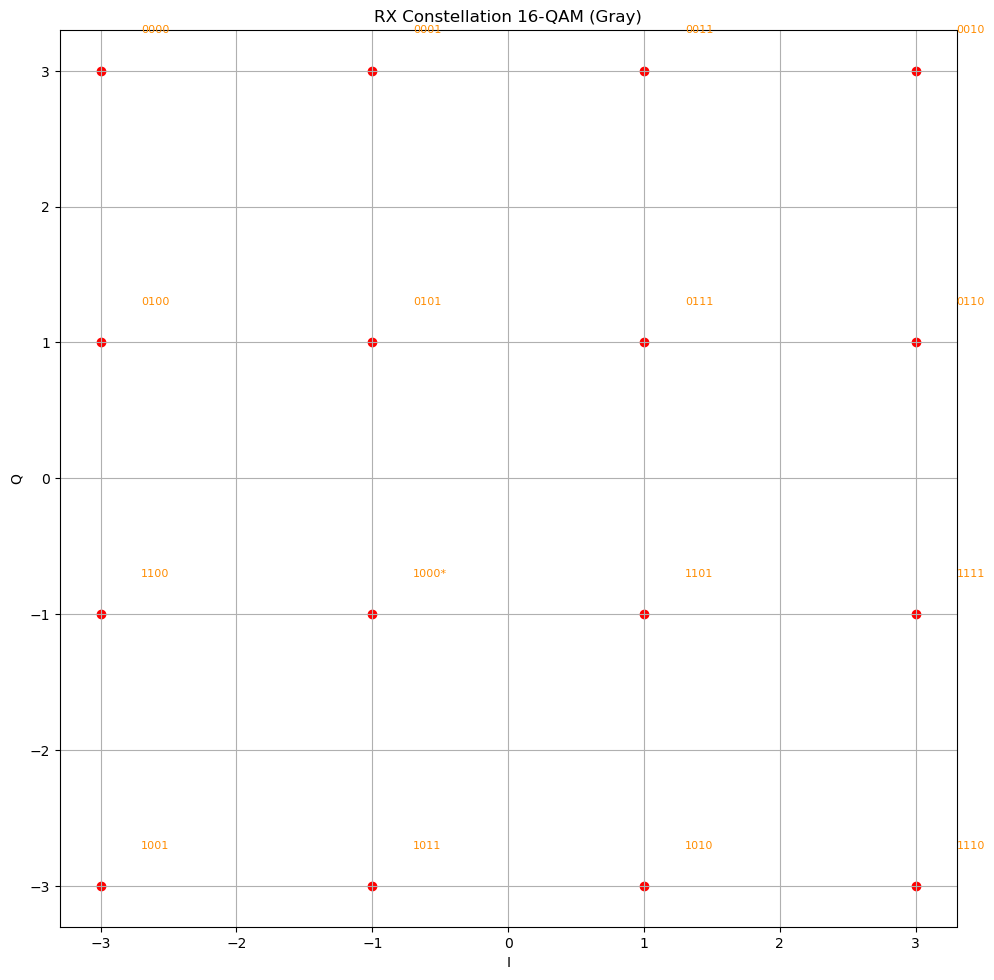

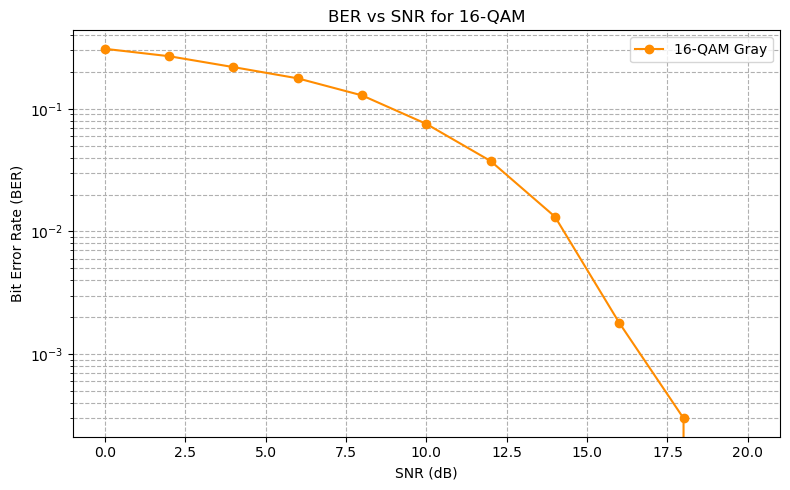

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Gray code helpers ----------
def to_gray(n): return n ^ (n >> 1)
def from_gray(g):
    n = 0
    while g:
        n ^= g
        g >>= 1
    return n

def decimal_to_binary_or_gray(n, k, use_gray):
    return format(to_gray(n) if use_gray else n, f'0{k}b')

# ---------- Suggestion dynamique du nombre de bits ----------
def ask_number_of_bits(M):
    if M <= 4:
        suggested = 5000
    elif M <= 16:
        suggested = 10000
    elif M <= 64:
        suggested = 20000
    elif M <= 256:
        suggested = 50000
    else:
        suggested = 100000

    while True:
        try:
            print(f"\n💡 Suggestion : Pour M = {M}, il est recommandé de transmettre au moins {suggested} bits.")
            value = input(f"Entrez le nombre total de bits à transmettre (par défaut : {suggested}) : ")
            num_bits = int(value) if value else suggested
            if num_bits > 0:
                return num_bits
            print("Le nombre doit être positif.")
        except:
            print("Entrée invalide. Veuillez entrer un nombre entier positif.")

# ---------- Generate constellation grid ----------
def generate_custom_constellation(M, use_gray, first_bits, i_val, q_val):
    bits_per_symbol = int(np.log2(M))
    grid_size = int(np.sqrt(M))
    I_axis = np.arange(-grid_size + 1, grid_size + 1, 2)
    Q_axis = np.flip(I_axis)

    all_symbols = [(to_gray(i), format(to_gray(i), f'0{bits_per_symbol}b')) if use_gray
                   else (i, format(i, f'0{bits_per_symbol}b')) for i in range(M)]

    start_index = next(i for i, (_, b) in enumerate(all_symbols) if b == first_bits)
    grid = np.full((grid_size, grid_size), None)

    row = np.where(Q_axis == q_val)[0][0]
    col = np.where(I_axis == i_val)[0][0]
    grid[row, col] = (*all_symbols[start_index], I_axis[col], Q_axis[row])

    remaining = all_symbols[:start_index] + all_symbols[start_index+1:]
    idx = 0
    for r in range(grid_size):
        cols = range(grid_size) if r % 2 == 0 else reversed(range(grid_size))
        for c in cols:
            if grid[r, c] is None:
                dec, bits = remaining[idx]
                grid[r, c] = (dec, bits, I_axis[c], Q_axis[r])
                idx += 1

    return grid

# ---------- Noise ----------
def add_awgn_noise(symbols, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    power = np.mean(np.sum(symbols**2, axis=1))
    noise_power = power / snr_linear
    noise = np.random.normal(0, np.sqrt(noise_power / 2), symbols.shape)
    return symbols + noise

# ---------- Format helpers ----------
def format_label(bits, M):
    return bits if M <= 64 else bits[:len(bits)//2] + "\n" + bits[len(bits)//2:]

def get_font_size(M):
    return 8 if M <= 64 else 6 if M <= 256 else 5

# ---------- BER simulation only ----------
def simulate_ber_only(M, num_bits, use_gray):
    bits_per_symbol = int(np.log2(M))
    grid_size = int(np.sqrt(M))
    I_axis = np.arange(-grid_size + 1, grid_size + 1, 2)
    Q_axis = np.flip(I_axis)

    all_symbols = [(to_gray(i), format(to_gray(i), f'0{bits_per_symbol}b')) if use_gray
                   else (i, format(i, f'0{bits_per_symbol}b')) for i in range(M)]

    constellation = {bits: np.array([i, q]) for (_, bits), (i, q) in zip(all_symbols, [(i, q) for q in Q_axis for i in I_axis])}
    bit_list = list(constellation.keys())
    iq_list = list(constellation.values())

    snr_range = range(0, 21, 2)
    ber_results = []

    for snr_db in snr_range:
        bits = np.random.randint(0, 2, num_bits)
        tx_symbols = []
        tx_bits = []

        for i in range(0, num_bits, bits_per_symbol):
            b = ''.join(map(str, bits[i:i+bits_per_symbol]))
            if b in constellation:
                tx_symbols.append(constellation[b])
                tx_bits.append(b)

        tx_array = np.array(tx_symbols)
        noisy_array = add_awgn_noise(tx_array, snr_db)

        decoded = []
        for pt in noisy_array:
            distances = np.linalg.norm(np.array(iq_list) - pt, axis=1)
            idx = np.argmin(distances)
            decoded.append(bit_list[idx])

        flat_tx = ''.join(tx_bits)
        flat_rx = ''.join(decoded)
        errors = sum(a != b for a, b in zip(flat_tx, flat_rx))
        ber_results.append(errors / len(flat_tx) if errors > 0 else 1e-6)

    return snr_range, ber_results

# ---------- Main Simulation + Affichage ----------
def simulate_and_plot(M, use_gray, num_bits, rx_first_bits, i_val, q_val):
    bits_per_symbol = int(np.log2(M))
    grid = generate_custom_constellation(M, use_gray, rx_first_bits, i_val, q_val)

    constellation = {bits: np.array([i, q]) for _, bits, i, q in grid.flatten() if bits is not None}
    bit_list = list(constellation.keys())
    iq_list = list(constellation.values())

    snr_range = range(0, 21, 2)
    ber_results = []

    for snr_db in snr_range:
        bits = np.random.randint(0, 2, num_bits)
        tx_symbols = []
        tx_bits = []
        for i in range(0, num_bits, bits_per_symbol):
            b = ''.join(map(str, bits[i:i+bits_per_symbol]))
            if b in constellation:
                tx_symbols.append(constellation[b])
                tx_bits.append(b)

        tx_array = np.array(tx_symbols)
        noisy_array = add_awgn_noise(tx_array, snr_db)

        decoded = []
        for pt in noisy_array:
            distances = np.linalg.norm(np.array(iq_list) - pt, axis=1)
            idx = np.argmin(distances)
            decoded.append(bit_list[idx])

        flat_tx = ''.join(tx_bits)
        flat_rx = ''.join(decoded)
        errors = sum(a != b for a, b in zip(flat_tx, flat_rx))
        ber_results.append(errors / len(flat_tx))
        
        # --- Constellation RX plot ---
    iq_array = np.array(iq_list)
    font_size = get_font_size(M)
    plt.figure(figsize=(10, 10))
    plt.scatter(iq_array[:, 0], iq_array[:, 1], color='red')

    for i, b in enumerate(bit_list):
        label = format_label(b, M)
        if b == rx_first_bits:
            label += "*"  # ⭐ Ajouter une étoile pour repérer le symbole choisi
        plt.annotate(label, (iq_array[i, 0] + 0.3, iq_array[i, 1] + 0.3), fontsize=font_size, color='darkorange', ha='left', va='center')

    plt.title(f"RX Constellation {M}-QAM ({'Gray' if use_gray else 'Binary'})")
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    plt.show()


    # --- BER plot ---
    plt.figure(figsize=(8, 5))
    plt.semilogy(snr_range, ber_results, marker='o', linestyle='-', label=f"{M}-QAM {'Gray' if use_gray else 'Binary'}", color='darkorange')
    plt.title(f"BER vs SNR for {M}-QAM")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Bit Error Rate (BER)")
    plt.grid(True, which='both', linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()

    
# ---------- Menu Principal ----------
def run_interactive():
    print("\n=== MENU ===")
    print("1. Simulation personnalisée (constellation + BER)")
    print("2. Comparaison BER : Gray vs Binaire")
    print("3. Quitter")
    choix = input("Entrez votre choix (1/2/3) : ").strip()

    if choix == "1":
        print("\nSimulation BER vs SNR avec constellation RX personnalisée")
        while True:
            try:
                M = int(input("Entrez M (ex: 4, 16, 64, 256): "))
                if np.log2(M) % 1 == 0 and np.sqrt(M) % 1 == 0:
                    break
                print("M doit être une puissance de 2 et un carré parfait.")
            except:
                print("Entrée invalide.")
        use_gray = input("🎛️ Utiliser le code Gray ? (o/n) : ").strip().lower() == "o"
        bits_per_symbol = int(np.log2(M))

        while True:
            try:
                rx_index = int(input(f"Entrez l’indice décimal du symbole à afficher en premier (entre 0 et {M-1}) : "))
                if 0 <= rx_index < M:
                    rx_first_bits = decimal_to_binary_or_gray(rx_index, bits_per_symbol, use_gray)
                    break
                print(f"❌ Entrez un nombre entre 0 et {M-1}.")
            except:
                print("❌ Entrée invalide.")
        grid_size = int(np.sqrt(M))
        axis_vals = list(np.arange(-grid_size + 1, grid_size + 1, 2))
        while True:
            try:
                i_val = int(input(f"Choisir la valeur I parmi {axis_vals} : "))
                q_val = int(input(f"Choisir la valeur Q parmi {axis_vals[::-1]} : "))
                if i_val in axis_vals and q_val in axis_vals:
                    break
                print("Valeurs I/Q hors de la grille.")
            except:
                print("Entrée invalide.")

        num_bits = ask_number_of_bits(M)
        simulate_and_plot(M, use_gray, num_bits, rx_first_bits, i_val, q_val)

    elif choix == "2":
        print("\nComparaison BER Gray vs Binaire")
        while True:
            try:
                M = int(input("Entrez M (ex: 4, 16, 64, 256): "))
                if np.log2(M) % 1 == 0 and np.sqrt(M) % 1 == 0:
                    break
                print("M doit être une puissance de 2 et un carré parfait.")
            except:
                print("Entrée invalide.")

        num_bits = ask_number_of_bits(M)
        snr_gray, ber_gray = simulate_ber_only(M, num_bits, use_gray=True)
        snr_bin, ber_bin = simulate_ber_only(M, num_bits, use_gray=False)

        plt.figure(figsize=(10, 5))
        plt.semilogy(snr_gray, ber_gray, marker='o', linestyle='-', label="Gray", color='darkorange')
        plt.semilogy(snr_bin, ber_bin, marker='s', linestyle='--', label="Binaire", color='crimson')
        plt.xlabel("SNR (dB)")
        plt.ylabel("Bit Error Rate (BER)")
        plt.title(f"Comparaison BER pour {M}-QAM : Gray vs Binaire")
        plt.grid(True, which='both', linestyle='--')
        plt.legend()
        plt.tight_layout()
        plt.show()

    elif choix == "3":
        print("\n✅ Programme terminé. À bientôt !")
    else:
        print("❌ Choix invalide. Relancez le programme.")

# ▶️ Lancer
run_interactive()


--------------------------------------------------------------------------------------------------------------------------------------------------------
 ## 1.Description globale du code
 
 Ce script Python est une interface interactive de simulation d’un modem QAM.

✅ Il permet à l'utilisateur de :

- Générer une constellation personnalisée en QAM (par exemple 4-QAM, 16-QAM, etc.).

- Choisir entre code binaire classique ou code Gray pour l’association des bits aux symboles QAM.

- Entrer l’indice décimal du symbole à afficher en premier dans la constellation RX :

***Le script convertit automatiquement cet indice :en code Gray si l’utilisateur choisit o (oui), en code binaire classique si l’utilisateur choisit    n (non). ➔ Cela facilite l'entrée utilisateur, en lui évitant de manipuler les bits directement.***

- Personnaliser la position du symbole de départ dans la constellation (I, Q), il est repéré par une étoile*.

- Simuler une transmission sur canal bruité (AWGN).

- Visualiser :

le diagramme de constellation RX avec les bits annotés,

une courbe BER (Bit Error Rate) selon le SNR.

Comparer les performances Gray vs Binaire.

Recevoir des recommandations dynamiques sur le nombre de bits à transmettre selon M.

## 2.Explication fonction par fonction

- ***to_gray(n):***
Convertit un nombre entier en code Gray.

- ***from_gray(g):***
Fait l'inverse : convertit un code Gray en entier décimal

- ***decimal_to_binary_or_gray(n, k, use_gray):***
Renvoie une chaîne binaire de longueur k : soit le binaire pur, soit le code Gray du nombre n.

- ***ask_number_of_bits(M):***
Propose dynamiquement un nombre recommandé de bits à transmettre selon la taille de la constellation M (plus M est grand, plus il faut de bits pour une estimation fiable du BER).

- ***generate_custom_constellation(M, use_gray, first_bits, i_val, q_val):***
Construit une grille QAM personnalisée :

-M = nombre de symboles,

-use_gray = True si code Gray,

-first_bits = bits du symbole à afficher en premier (avec *),

-i_val, q_val = coordonnées dans la grille où positionner ce symbole.

- ***add_awgn_noise(symbols, snr_db):***
Ajoute un bruit AWGN (Additive White Gaussian Noise) au signal, selon le SNR donné.

- ***format_label(bits, M):***
Formate les bits pour les afficher lisiblement dans la constellation.

- ***get_font_size(M):***
Détermine dynamiquement la taille de police à utiliser dans le graphe.

- ***simulate_ber_only(M, num_bits, use_gray):***
Simule une transmission de num_bits aléatoires avec modulation QAM de taille M, et code binaire ou Gray :

-Ajoute du bruit AWGN pour différents niveaux de SNR (0 → 20 dB),

-Calcule le BER (bit error rate) pour chaque SNR.

- ***simulate_and_plot(M, use_gray, num_bits, rx_first_bits, i_val, q_val):***
Affiche la constellation RX annotée avec les bits.

-Simule une transmission avec bruit AWGN.

-Calcule le BER pour plusieurs SNR.

-Trace le graphe BER vs SNR.



- ***run_interactive():***
Le menu principal interactif :

-Simulation personnalisée :

L'utilisateur entre : M, type de codage, symbole de référence, sa position, nombre de bits.

Le code affiche la constellation et le BER.

-Comparaison Gray vs Binaire :

Le code trace deux courbes BER vs SNR.

-Quitter le programme.



- ***run_interactive() (à la fin):***
▶️ Lance automatiquement le menu interactif lorsque tu exécutes le script.







 

 

Entrez M (ex: 4, 16, 64, 256):  16
Utiliser le code Gray ? (o/n) :  o
Indice du premier symbole (0 à 15) :  15
Choisir I parmi [-3, -1, 1, 3] :  -1
Choisir Q parmi [3, 1, -1, -3] :  -1
Valeur de SNR en dB :  20



Type de bruit disponible :
1 - AWGN
2 - Bruit de phase
3 - AWGN + Bruit de phase


Entrez votre choix (1/2/3) :  1
Chemin de l'image à transmettre :  C:\Users\OUSSAMA PC\Downloads\364051-svetik.jpg



✅ BER obtenu : 0.000028


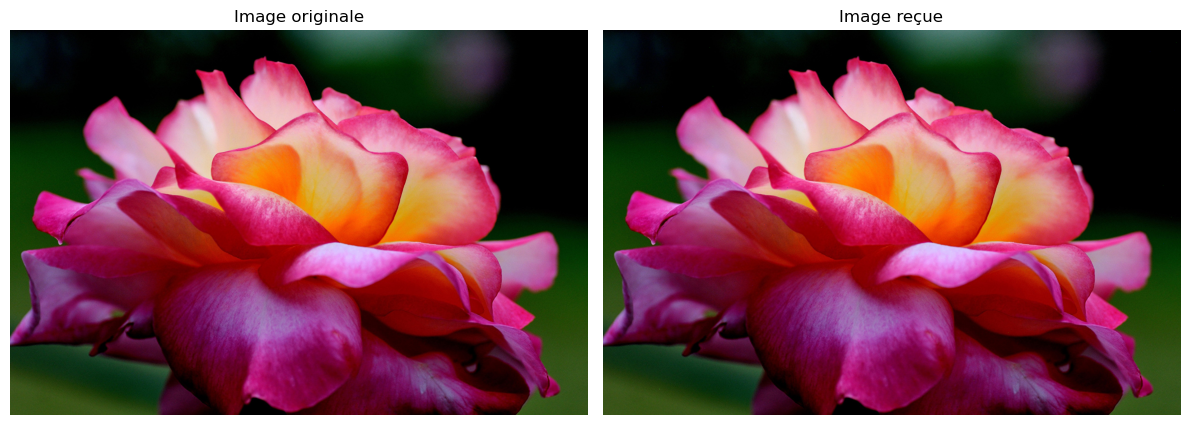

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# === Fonctions utilitaires ===
def to_gray(n):
    return n ^ (n >> 1)

def decimal_to_binary_or_gray(n, k, use_gray):
    return format(to_gray(n) if use_gray else n, f'0{k}b')

def add_awgn_noise(symbols, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    power = np.mean(np.sum(symbols**2, axis=1))
    noise_power = power / snr_linear
    noise = np.random.normal(0, np.sqrt(noise_power / 2), symbols.shape)
    return symbols + noise

def add_phase_noise(symbols, max_phase_deg=5):
    max_phase_rad = np.deg2rad(max_phase_deg)
    phase_noise = np.random.uniform(-max_phase_rad, max_phase_rad, size=(symbols.shape[0],))
    rotated_symbols = np.empty_like(symbols)
    for idx, point in enumerate(symbols):
        I, Q = point
        magnitude = np.sqrt(I**2 + Q**2)
        angle = np.arctan2(Q, I) + phase_noise[idx]
        rotated_symbols[idx, 0] = magnitude * np.cos(angle)
        rotated_symbols[idx, 1] = magnitude * np.sin(angle)
    return rotated_symbols

# === Chargement flexible de l'image ===
def load_image(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    return img_array

# === Codage image en bits ===
def image_to_bits(img_array):
    if img_array.ndim == 2:
        return np.unpackbits(img_array.flatten()), img_array.shape, 'L'
    elif img_array.ndim == 3 and img_array.shape[2] == 3:
        r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
        r_bits = np.unpackbits(r.flatten())
        g_bits = np.unpackbits(g.flatten())
        b_bits = np.unpackbits(b.flatten())
        return (r_bits, g_bits, b_bits), img_array.shape, 'RGB'
    else:
        raise ValueError("Format d'image non supporté.")

# === Décodage bits en image ===
def bits_to_image(bits, original_shape, mode):
    if mode == 'L':
        padded_len = ((len(bits) + 7) // 8) * 8
        bits_padded = np.pad(bits, (0, padded_len - len(bits)), constant_values=0)
        pixels = np.packbits(bits_padded)
        img_array = pixels[:np.prod(original_shape)].reshape(original_shape)
        return img_array
    elif mode == 'RGB':
        r_bits, g_bits, b_bits = bits
        def bits_to_channel(bits, size):
            padded_len = ((len(bits) + 7) // 8) * 8
            bits_padded = np.pad(bits, (0, padded_len - len(bits)), constant_values=0)
            pixels = np.packbits(bits_padded)
            return pixels[:size]
        h, w, _ = original_shape
        r = bits_to_channel(r_bits, h*w).reshape((h, w))
        g = bits_to_channel(g_bits, h*w).reshape((h, w))
        b = bits_to_channel(b_bits, h*w).reshape((h, w))
        return np.stack([r, g, b], axis=2)

# === Mapping bits -> symboles ===
def bits_to_symbols(bits, bits_per_symbol, constellation):
    symbols = []
    bits = bits.tolist()
    for i in range(0, len(bits), bits_per_symbol):
        b = ''.join(map(str, bits[i:i+bits_per_symbol]))
        if len(b) < bits_per_symbol:
            b = b.ljust(bits_per_symbol, '0')
        symbols.append(constellation[b])
    return np.array(symbols)

# === Mapping symboles -> bits ===
def symbols_to_bits(symbols_rx, iq_list, bit_list):
    decoded_bits = []
    for pt in symbols_rx:
        distances = np.linalg.norm(iq_list - pt, axis=1)
        idx = np.argmin(distances)
        decoded_bits.append(bit_list[idx])
    decoded_bits_flat = ''.join(decoded_bits)
    return np.array([int(b) for b in decoded_bits_flat])

# === Transmission principale ===
def transmit_image_qam():
    M = int(input("Entrez M (ex: 4, 16, 64, 256): "))
    use_gray = input("Utiliser le code Gray ? (o/n) : ").strip().lower() == 'o'
    bits_per_symbol = int(np.log2(M))

    rx_index = int(input(f"Indice du premier symbole (0 à {M-1}) : "))
    rx_first_bits = decimal_to_binary_or_gray(rx_index, bits_per_symbol, use_gray)

    grid_size = int(np.sqrt(M))
    axis_vals = list(np.arange(-grid_size + 1, grid_size + 1, 2))
    i_val = int(input(f"Choisir I parmi {axis_vals} : "))
    q_val = int(input(f"Choisir Q parmi {axis_vals[::-1]} : "))

    snr_db = float(input("Valeur de SNR en dB : "))
    print("\nType de bruit disponible :\n1 - AWGN\n2 - Bruit de phase\n3 - AWGN + Bruit de phase")
    noise_choice = input("Entrez votre choix (1/2/3) : ").strip()

    image_path = input("Chemin de l'image à transmettre : ").strip()

    if not os.path.exists(image_path):
        print("Image non trouvée.")
        return

    img_array = load_image(image_path)
    bits, original_shape, mode = image_to_bits(img_array)

    I_axis = np.arange(-grid_size + 1, grid_size + 1, 2)
    Q_axis = np.flip(I_axis)

    all_symbols = [(to_gray(i), format(to_gray(i), f'0{bits_per_symbol}b')) if use_gray
                   else (i, format(i, f'0{bits_per_symbol}b')) for i in range(M)]

    constellation = {bits: np.array([i, q]) for (_, bits), (i, q) in zip(all_symbols, [(i, q) for q in Q_axis for i in I_axis])}
    bit_list = list(constellation.keys())
    iq_list = np.array(list(constellation.values()))

    def apply_noise(tx_symbols):
        if noise_choice == '1':
            return add_awgn_noise(tx_symbols, snr_db)
        elif noise_choice == '2':
            return add_phase_noise(tx_symbols)
        elif noise_choice == '3':
            return add_phase_noise(add_awgn_noise(tx_symbols, snr_db))
        else:
            print("Choix de bruit invalide. Utilisation AWGN par défaut.")
            return add_awgn_noise(tx_symbols, snr_db)

    if mode == 'L':
        tx_symbols = bits_to_symbols(bits, bits_per_symbol, constellation)
        rx_symbols = apply_noise(tx_symbols)
        rx_bits = symbols_to_bits(rx_symbols, iq_list, bit_list)
        img_rx = bits_to_image(rx_bits, original_shape, mode)
        min_len = min(len(bits), len(rx_bits))
        errors = np.sum(bits[:min_len] != rx_bits[:min_len])
        ber = errors / min_len
    else:
        r_bits, g_bits, b_bits = bits
        img_rx_channels = []
        total_errors, total_bits = 0, 0
        for ch_bits in [r_bits, g_bits, b_bits]:
            tx_symbols = bits_to_symbols(ch_bits, bits_per_symbol, constellation)
            rx_symbols = apply_noise(tx_symbols)
            rx_ch_bits = symbols_to_bits(rx_symbols, iq_list, bit_list)
            img_rx_channels.append(rx_ch_bits)
            min_len = min(len(ch_bits), len(rx_ch_bits))
            total_errors += np.sum(ch_bits[:min_len] != rx_ch_bits[:min_len])
            total_bits += min_len
        img_rx = bits_to_image(tuple(img_rx_channels), original_shape, mode)
        ber = total_errors / total_bits

    print(f"\n✅ BER obtenu : {ber:.6f}")

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    if mode == 'L':
        axs[0].imshow(img_array, cmap='gray')
        axs[1].imshow(img_rx, cmap='gray')
    else:
        axs[0].imshow(img_array)
        axs[1].imshow(img_rx)

    axs[0].set_title("Image originale")
    axs[0].axis('off')

    axs[1].set_title("Image reçue")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# === Lancer ===
transmit_image_qam()


--------------------------------------------------------------------------------------------------------------------------------------------------------
## 1.Description globale du code

Ce script Python est une plateforme flexible de simulation d’un modem QAM pour transmission d’images :

✅ L'utilisateur peut :

- Choisir la taille de la constellation (M-QAM, ex: 16-QAM, 64-QAM...).

- Utiliser le code Gray ou le code binaire classique pour l’association des bits aux symboles.

- Choisir un symbole de départ (indice décimal) et sa position (I/Q) sur la grille.

- Sélectionner le type de bruit affectant la transmission :

Bruit AWGN,

Bruit de phase,

Ou une combinaison des deux.

- Transmettre une image (grayscale ou couleur) en la modulant avec QAM.

- Observer l'image reçue après transmission bruitée.

- Calculer automatiquement le BER (Bit Error Rate).

## 2.Explication fonction par fonction de code

- ***to_gray(n):***
Convertit un nombre entier n en code Gray.



- ***decimal_to_binary_or_gray(n, k, use_gray):***
Retourne une chaîne de k bits : soit le binaire classique, soit le code Gray selon use_gray.

- ***add_awgn_noise(symbols, snr_db):***
Ajoute du bruit gaussien blanc (AWGN) aux symboles transmis selon un SNR donné. 

- ***add_phase_noise(symbols, max_phase_deg=5):***
Ajoute un bruit de phase : une petite rotation aléatoire sur chaque symbole pour simuler un désalignement de phase (jusqu’à ±5° par défaut).

- ***load_image(image_path):***
Charge une image à partir du chemin donné.
Supporte automatiquement niveaux de gris (L) et couleur RGB.

- ***image_to_bits(img_array):***
Convertit l’image chargée en une séquence de bits :

Un seul vecteur pour une image en niveaux de gris.

Trois vecteurs (R, G, B) pour une image couleur.


- ***bits_to_image(bits, original_shape, mode):***
Reconstruit une image à partir de séquences de bits :

Mode L : image en niveaux de gris.

Mode RGB : image couleur recomposée depuis R, G, B.



- ***bits_to_symbols(bits, bits_per_symbol, constellation):***
Regroupe les bits en blocs (bits_per_symbol) et les associe aux points IQ de la constellation.



- ***symbols_to_bits(symbols_rx, iq_list, bit_list):***
Démodule les symboles reçus :
Pour chaque point reçu, on cherche dans la constellation le point le plus proche (minimum de la distance Euclidienne) et on récupère ses bits associés.



- ***transmit_image_qam():***
Cœur du programme :

Dialogue interactif avec l’utilisateur :

Choix de la modulation (M, Gray/binaire, symbole de départ, position I/Q),

Choix du SNR,

Choix du type de bruit.

Chargement et codage de l'image.

Transmission simulée avec ajout de bruit.

Démodulation et reconstruction de l’image.

Calcul du BER.

Affichage des images avant/après transmission.

## 3.Résultat obtenu
- Image originale:couleur nette, naturelle, sans artefacts.
  
- Image reçue:très proche de l’originale malgré le bruit.

- Les deux images sont visuellement quasi identiques, preuve que la transmission est de haute qualité.

- Le BER obtenu est très faible : 0.000028, soit environ 0,0028 % de bits en erreur, ce qui est excellent.

- Même avec bruit de phase ajouté, l’algorithme de détection des symboles fonctionne très bien.









Entrez M (ex: 4, 16, 64, 256):  16
Utiliser le code Gray ? (o/n) :  o
Indice du premier symbole (0 à 15) :  15
Choisir I parmi [-3, -1, 1, 3] :  -1
Choisir Q parmi [3, 1, -1, -3] :  -1
Valeur de SNR en dB :  20



Type de bruit disponible :
1 - AWGN
2 - Bruit de phase
3 - AWGN + Bruit de phase


Entrez votre choix (1/2/3) :  3
Chemin de l'image à transmettre :  C:\Users\OUSSAMA PC\Downloads\grayscale-rose-1478187.jpg



✅ BER obtenu : 0.000041


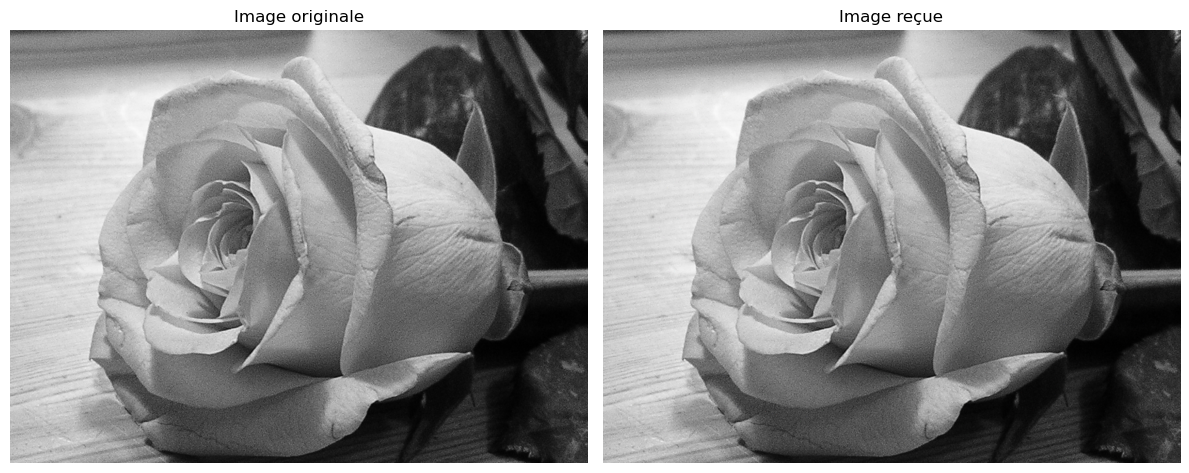

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# === Fonctions utilitaires ===
def to_gray(n):
    return n ^ (n >> 1)

def decimal_to_binary_or_gray(n, k, use_gray):
    return format(to_gray(n) if use_gray else n, f'0{k}b')

def add_awgn_noise(symbols, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    power = np.mean(np.sum(symbols**2, axis=1))
    noise_power = power / snr_linear
    noise = np.random.normal(0, np.sqrt(noise_power / 2), symbols.shape)
    return symbols + noise

def add_phase_noise(symbols, max_phase_deg=5):
    max_phase_rad = np.deg2rad(max_phase_deg)
    phase_noise = np.random.uniform(-max_phase_rad, max_phase_rad, size=(symbols.shape[0],))
    rotated_symbols = np.empty_like(symbols)
    for idx, point in enumerate(symbols):
        I, Q = point
        magnitude = np.sqrt(I**2 + Q**2)
        angle = np.arctan2(Q, I) + phase_noise[idx]
        rotated_symbols[idx, 0] = magnitude * np.cos(angle)
        rotated_symbols[idx, 1] = magnitude * np.sin(angle)
    return rotated_symbols

# === Chargement flexible de l'image ===
def load_image(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    return img_array

# === Codage image en bits ===
def image_to_bits(img_array):
    if img_array.ndim == 2:
        return np.unpackbits(img_array.flatten()), img_array.shape, 'L'
    elif img_array.ndim == 3 and img_array.shape[2] == 3:
        r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
        r_bits = np.unpackbits(r.flatten())
        g_bits = np.unpackbits(g.flatten())
        b_bits = np.unpackbits(b.flatten())
        return (r_bits, g_bits, b_bits), img_array.shape, 'RGB'
    else:
        raise ValueError("Format d'image non supporté.")

# === Décodage bits en image ===
def bits_to_image(bits, original_shape, mode):
    if mode == 'L':
        padded_len = ((len(bits) + 7) // 8) * 8
        bits_padded = np.pad(bits, (0, padded_len - len(bits)), constant_values=0)
        pixels = np.packbits(bits_padded)
        img_array = pixels[:np.prod(original_shape)].reshape(original_shape)
        return img_array
    elif mode == 'RGB':
        r_bits, g_bits, b_bits = bits
        def bits_to_channel(bits, size):
            padded_len = ((len(bits) + 7) // 8) * 8
            bits_padded = np.pad(bits, (0, padded_len - len(bits)), constant_values=0)
            pixels = np.packbits(bits_padded)
            return pixels[:size]
        h, w, _ = original_shape
        r = bits_to_channel(r_bits, h*w).reshape((h, w))
        g = bits_to_channel(g_bits, h*w).reshape((h, w))
        b = bits_to_channel(b_bits, h*w).reshape((h, w))
        return np.stack([r, g, b], axis=2)

# === Mapping bits -> symboles ===
def bits_to_symbols(bits, bits_per_symbol, constellation):
    symbols = []
    bits = bits.tolist()
    for i in range(0, len(bits), bits_per_symbol):
        b = ''.join(map(str, bits[i:i+bits_per_symbol]))
        if len(b) < bits_per_symbol:
            b = b.ljust(bits_per_symbol, '0')
        symbols.append(constellation[b])
    return np.array(symbols)

# === Mapping symboles -> bits ===
def symbols_to_bits(symbols_rx, iq_list, bit_list):
    decoded_bits = []
    for pt in symbols_rx:
        distances = np.linalg.norm(iq_list - pt, axis=1)
        idx = np.argmin(distances)
        decoded_bits.append(bit_list[idx])
    decoded_bits_flat = ''.join(decoded_bits)
    return np.array([int(b) for b in decoded_bits_flat])

# === Transmission principale ===
def transmit_image_qam():
    M = int(input("Entrez M (ex: 4, 16, 64, 256): "))
    use_gray = input("Utiliser le code Gray ? (o/n) : ").strip().lower() == 'o'
    bits_per_symbol = int(np.log2(M))

    rx_index = int(input(f"Indice du premier symbole (0 à {M-1}) : "))
    rx_first_bits = decimal_to_binary_or_gray(rx_index, bits_per_symbol, use_gray)

    grid_size = int(np.sqrt(M))
    axis_vals = list(np.arange(-grid_size + 1, grid_size + 1, 2))
    i_val = int(input(f"Choisir I parmi {axis_vals} : "))
    q_val = int(input(f"Choisir Q parmi {axis_vals[::-1]} : "))

    snr_db = float(input("Valeur de SNR en dB : "))
    print("\nType de bruit disponible :\n1 - AWGN\n2 - Bruit de phase\n3 - AWGN + Bruit de phase")
    noise_choice = input("Entrez votre choix (1/2/3) : ").strip()

    image_path = input("Chemin de l'image à transmettre : ").strip()

    if not os.path.exists(image_path):
        print("Image non trouvée.")
        return

    img_array = load_image(image_path)
    bits, original_shape, mode = image_to_bits(img_array)

    I_axis = np.arange(-grid_size + 1, grid_size + 1, 2)
    Q_axis = np.flip(I_axis)

    all_symbols = [(to_gray(i), format(to_gray(i), f'0{bits_per_symbol}b')) if use_gray
                   else (i, format(i, f'0{bits_per_symbol}b')) for i in range(M)]

    constellation = {bits: np.array([i, q]) for (_, bits), (i, q) in zip(all_symbols, [(i, q) for q in Q_axis for i in I_axis])}
    bit_list = list(constellation.keys())
    iq_list = np.array(list(constellation.values()))

    def apply_noise(tx_symbols):
        if noise_choice == '1':
            return add_awgn_noise(tx_symbols, snr_db)
        elif noise_choice == '2':
            return add_phase_noise(tx_symbols)
        elif noise_choice == '3':
            return add_phase_noise(add_awgn_noise(tx_symbols, snr_db))
        else:
            print("Choix de bruit invalide. Utilisation AWGN par défaut.")
            return add_awgn_noise(tx_symbols, snr_db)

    if mode == 'L':
        tx_symbols = bits_to_symbols(bits, bits_per_symbol, constellation)
        rx_symbols = apply_noise(tx_symbols)
        rx_bits = symbols_to_bits(rx_symbols, iq_list, bit_list)
        img_rx = bits_to_image(rx_bits, original_shape, mode)
        min_len = min(len(bits), len(rx_bits))
        errors = np.sum(bits[:min_len] != rx_bits[:min_len])
        ber = errors / min_len
    else:
        r_bits, g_bits, b_bits = bits
        img_rx_channels = []
        total_errors, total_bits = 0, 0
        for ch_bits in [r_bits, g_bits, b_bits]:
            tx_symbols = bits_to_symbols(ch_bits, bits_per_symbol, constellation)
            rx_symbols = apply_noise(tx_symbols)
            rx_ch_bits = symbols_to_bits(rx_symbols, iq_list, bit_list)
            img_rx_channels.append(rx_ch_bits)
            min_len = min(len(ch_bits), len(rx_ch_bits))
            total_errors += np.sum(ch_bits[:min_len] != rx_ch_bits[:min_len])
            total_bits += min_len
        img_rx = bits_to_image(tuple(img_rx_channels), original_shape, mode)
        ber = total_errors / total_bits

    print(f"\n✅ BER obtenu : {ber:.6f}")

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    if mode == 'L':
        axs[0].imshow(img_array, cmap='gray')
        axs[1].imshow(img_rx, cmap='gray')
    else:
        axs[0].imshow(img_array)
        axs[1].imshow(img_rx)

    axs[0].set_title("Image originale")
    axs[0].axis('off')

    axs[1].set_title("Image reçue")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# === Lancer ===
transmit_image_qam()


--------------------------------------------------------------------------------------------------------------------------------------------------------
 ## Résultat obtenu :
- Image originale vs. Image reçue :
Les deux images affichées montrent très peu de différence visuelle, signe que la transmission a été très fiable malgré la présence de deux types de bruit( AWGN + Bruit de phase).

- BER obtenu : 0.000041
Cela signifie qu’en moyenne, seulement 4 bits sur 100 000 ont été reçus de façon erronée. C’est une excellente performance, notamment grâce au SNR élevé (20 dB).